In [2]:
## import all required library
import time, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

In [3]:
## Use dataset from sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [4]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
X, y = data.data, data.target


In [6]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
## n-component choice(fraction or int)
n_component_list= ['all',0.99, 0.95, 0.90, 0.80, 10, 5]


In [8]:
models = {
     'LogReg': LogisticRegression(),
     'SVC': SVC(),
     'RandomForest': RandomForestClassifier()

 }

In [9]:
for n_comp in n_component_list:
  if n_comp == 'all':
    Xtr, Xte = X_train, X_test
    explained = 1.0
    comp = Xtr.shape[1]
  else:
    pca = PCA(n_components=n_comp)
    Xtr = pca.fit_transform(X_train)
    Xte = pca.transform(X_test)
    explained = pca.explained_variance_ratio_.sum()
    comp = Xtr.shape[1]

In [10]:
models = {
     'LogReg': LogisticRegression(),
     'SVC': SVC(),
     'RandomForest': RandomForestClassifier()
 }

results = []
for n_comp in n_component_list:
  if n_comp == 'all':
    Xtr, Xte = X_train, X_test
    explained = 1.0
    comp = Xtr.shape[1]
  else:
    pca = PCA(n_components=n_comp)
    Xtr = pca.fit_transform(X_train)
    Xte = pca.transform(X_test)
    explained = pca.explained_variance_ratio_.sum()
    comp = Xtr.shape[1]

  for name, model_instance in models.items():
    #timing training
    t0 = time.time()
    model = model_instance.fit(Xtr, y_train)
    t1 = time.time()
    train_time = t1 -t0

    #evaluation
    ypred = model.predict(Xte)
    accuracy = accuracy_score(y_test, ypred)
    f1 = f1_score(y_test, ypred)

    results.append({
        'model': name,
        'n_components': comp,
        'explained_variance': explained,
        'train_time': train_time,
        'accuracy': accuracy,
        'f1_score': f1
    })
df_results = pd.DataFrame(results)
print(df_results)

           model  n_components  explained_variance  train_time  accuracy  \
0         LogReg            30            1.000000    0.101830  0.973684   
1            SVC            30            1.000000    0.019727  0.982456   
2   RandomForest            30            1.000000    0.442144  0.964912   
3         LogReg            17            0.991169    0.037187  0.982456   
4            SVC            17            0.991169    0.016542  0.982456   
5   RandomForest            17            0.991169    0.478165  0.947368   
6         LogReg            10            0.951058    0.048472  0.982456   
7            SVC            10            0.951058    0.014119  0.964912   
8   RandomForest            10            0.951058    0.390018  0.947368   
9         LogReg             7            0.908725    0.047650  0.982456   
10           SVC             7            0.908725    0.011121  0.973684   
11  RandomForest             7            0.908725    0.351788  0.947368   
12        Lo

/tmp/ipython-input-424448213.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


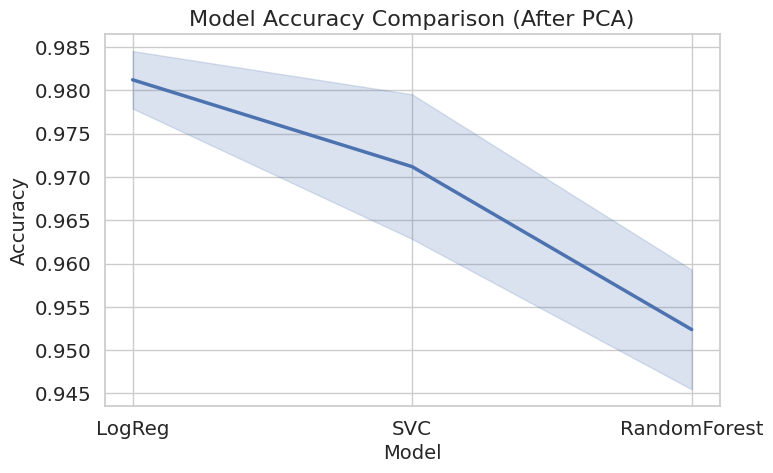

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.3)

plt.figure(figsize=(8,5))
sns.lineplot(
    data=df_results,
    x="model",
    y="accuracy",
    estimator="mean",
    ci="sd",
    linewidth=2.5
)

plt.title("Model Accuracy Comparison (After PCA)", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.tight_layout()
plt.show()


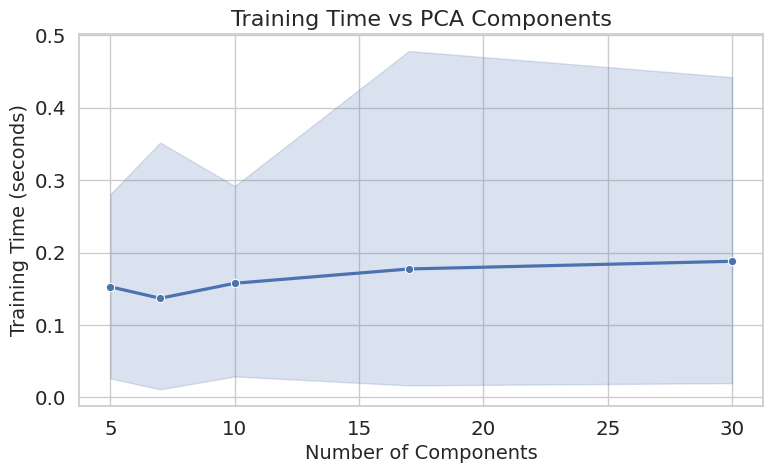

In [17]:
plt.figure(figsize=(8,5))

sns.lineplot(
    data=df_results.sort_values("n_components"),
    x="n_components",
    y="train_time",
    marker="o",
    linewidth=2.3
)

plt.title("Training Time vs PCA Components", fontsize=16)
plt.xlabel("Number of Components", fontsize=14)
plt.ylabel("Training Time (seconds)", fontsize=14)
plt.tight_layout()
plt.show()


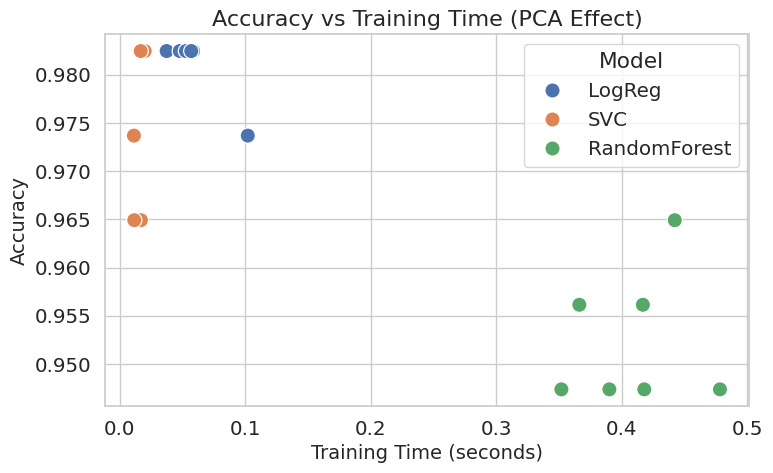

In [18]:
plt.figure(figsize=(8,5))

sns.scatterplot(
    data=df_results,
    x="train_time",
    y="accuracy",
    hue="model",
    s=120
)

plt.title("Accuracy vs Training Time (PCA Effect)", fontsize=16)
plt.xlabel("Training Time (seconds)", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(title="Model")
plt.tight_layout()
plt.show()


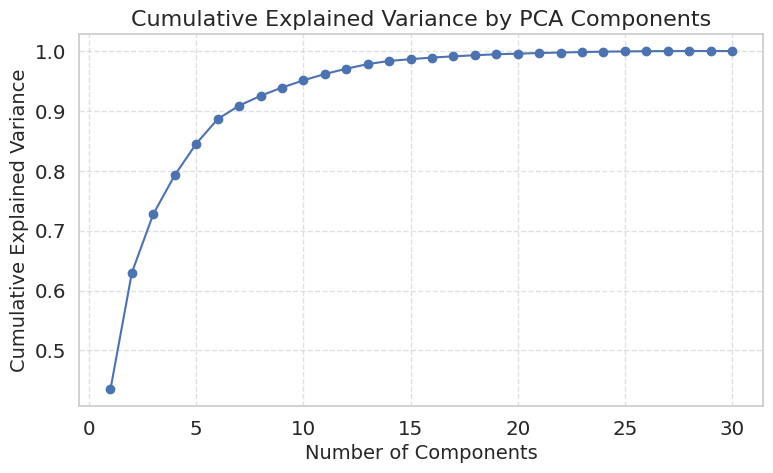

In [20]:
pca = PCA().fit(X_train)
plt.figure(figsize=(8,5))

plt.plot(
    range(1, len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_.cumsum(),
    marker='o'
)

plt.title("Cumulative Explained Variance by PCA Components", fontsize=16)
plt.xlabel("Number of Components", fontsize=14)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
